In [2]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
#Load Dataset
iris = datasets.load_iris()

In [4]:
# Analyse dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Create dataframe
df = pd.DataFrame({'x':iris.data[:,0], 'y':iris.data[:,1], 'cluster':iris.target})


In [8]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


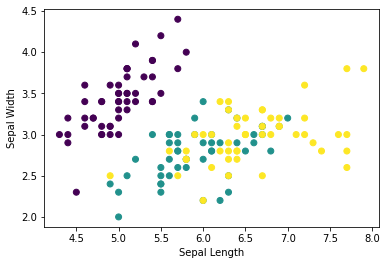

In [9]:
# Plot the data points
plt.scatter(df["x"], df["y"], c=iris.target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [10]:
# Choose k (=3) random centroids
df0 = df.sample(n=3)
df0

,x,y,cluster
88,5.6,3.0,1
1,4.9,3.0,0
2,4.7,3.2,0


In [11]:
centroid = {}

for i in range(3):
    res = []
    res.append(df0.iloc[i].x)
    res.append(df0.iloc[i].y)
    centroid[i] = res



In [13]:

centerPts = {0:'r',1:'g',2:'y'}


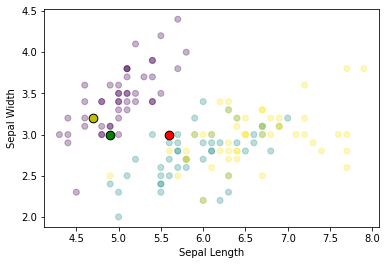

In [14]:
plt.scatter(df["x"], df["y"], c=iris.target, alpha=0.3)

for i in range(3):
    plt.scatter(centroid[i][0], centroid[i][1], color=centerPts[i], s=75, edgecolors="black")
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


In [15]:
# Calculate closest points to centroids and assign new cluster
def assignment(df, centroid):
    for i in range(3):
        df['dist_cluster{}'.format(i)] = (np.sqrt((df['x'] - centroid[i][0]) ** 2 + (df['y'] - centroid[i][1]) ** 2))
        
    centroid_distance_cols = ['dist_cluster{}'.format(i) for i in centroid.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('dist_cluster{}')))
    df['color'] = df['closest'].map(lambda x: centerPts[x])
    
    return df

In [16]:

df = assignment(df, centroid)
df
# Calculate new centroids
def updateCentroid():
    for i in range(3):
        centroid[i][0] = df.loc[df["closest"]==i]["x"].mean()
        centroid[i][1] = df.loc[df["closest"]==i]["y"].mean()


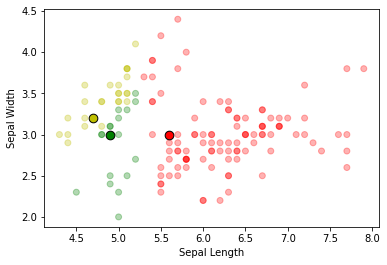

In [17]:
plt.scatter(df['x'], df['y'], color=df["color"], alpha=0.3)

for i in centroid.keys():
    plt.scatter(centroid[i][0], centroid[i][1], color=centerPts[i], s=75, edgecolors="k")
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [18]:
# Continue until all assigned clusters do not change
while True:
    closest_centroids = df['closest'].copy(deep=True)
    updateCentroid()
    df = assignment(df, centroid)
    if closest_centroids.equals(df['closest']):
        break


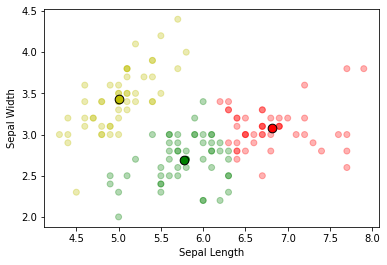

In [19]:
plt.scatter(df['x'], df['y'], color=df["color"], alpha=0.3)

for i in centroid.keys():
    plt.scatter(centroid[i][0], centroid[i][1],color=centerPts[i], s=75, edgecolors="k")
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
